# Data Preprocessing for house.csv
## RP Tumba College - Machine Learning Level 8
### Individual Assignment - Learning Outcome 1

This notebook performs a complete data preprocessing workflow on the house.csv dataset.

**Author:** IZERE HIRWA Roger 
**Date:** 27/11/2025

---

In [45]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-whitegrid')

print("All libraries imported successfully!")

All libraries imported successfully!


## Load the Dataset

In [46]:
# Load the dataset
df = pd.read_csv('Housing.xls')

# Create a copy for comparison later
df_original = df.copy()

# Basic dataset information
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\nShape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumn Names:\n{df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nFirst 5 rows:")
df.head()

DATASET OVERVIEW

Shape: 545 rows × 13 columns

Column Names:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

Data Types:
price                 int64
area                float64
bedrooms              int64
bathrooms           float64
stories               int64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking               int64
prefarea             object
furnishingstatus     object
dtype: object

First 5 rows:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2.0,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4.0,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3,2.0,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,NaN,4,2.0,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,NaN,4,1.0,2,yes,yes,yes,no,yes,2,no,furnished


---
## 1. Statistical Summary of Numerical Variables

### 1a. Generate Statistical Summary

We will analyze all numerical variables to understand their distribution, central tendency, and spread.

In [47]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns identified: {numerical_cols}")
print(f"Total numerical columns: {len(numerical_cols)}")

Numerical columns identified: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Total numerical columns: 6


In [48]:
# Generate comprehensive statistical summary
statistical_summary = df[numerical_cols].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T

# Add additional statistics
statistical_summary['variance'] = df[numerical_cols].var()
statistical_summary['skewness'] = df[numerical_cols].skew()
statistical_summary['kurtosis'] = df[numerical_cols].kurtosis()
statistical_summary['missing_count'] = df[numerical_cols].isnull().sum()
statistical_summary['missing_percent'] = (df[numerical_cols].isnull().sum() / len(df)) * 100

print("="*60)
print("COMPREHENSIVE STATISTICAL SUMMARY")
print("="*60)
statistical_summary

COMPREHENSIVE STATISTICAL SUMMARY


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max,variance,skewness,kurtosis,missing_count,missing_percent
price,545.0,4.766729e+06,1.870440e+06,1750000.0,1870400.0,2450000.0,3430000.0,4340000.0,5740000.0,8400000.0,10542000.0,13300000.0,3.498544e+12,1.212239,1.960130,0,0.000000
area,542.0,5.127168e+03,2.143733e+03,1650.0,1970.5,2553.0,3588.0,4540.0,6360.0,8998.0,11831.7,16200.0,4.595590e+06,1.308216,2.755046,3,0.550459
bedrooms,545.0,3.691743e+00,1.702314e+01,1.0,2.0,2.0,2.0,3.0,3.0,4.0,5.0,400.0,2.897872e+02,23.279477,542.949099,0,0.000000
bathrooms,544.0,1.284926e+00,5.019967e-01,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,2.520007e-01,1.599262,2.203253,1,0.183486
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,1.0,1.0,2.0,2.0,4.0,4.0,4.0,7.525432e-01,1.082088,0.679404,0,0.000000
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0,7.423300e-01,0.842062,-0.573063,0,0.000000


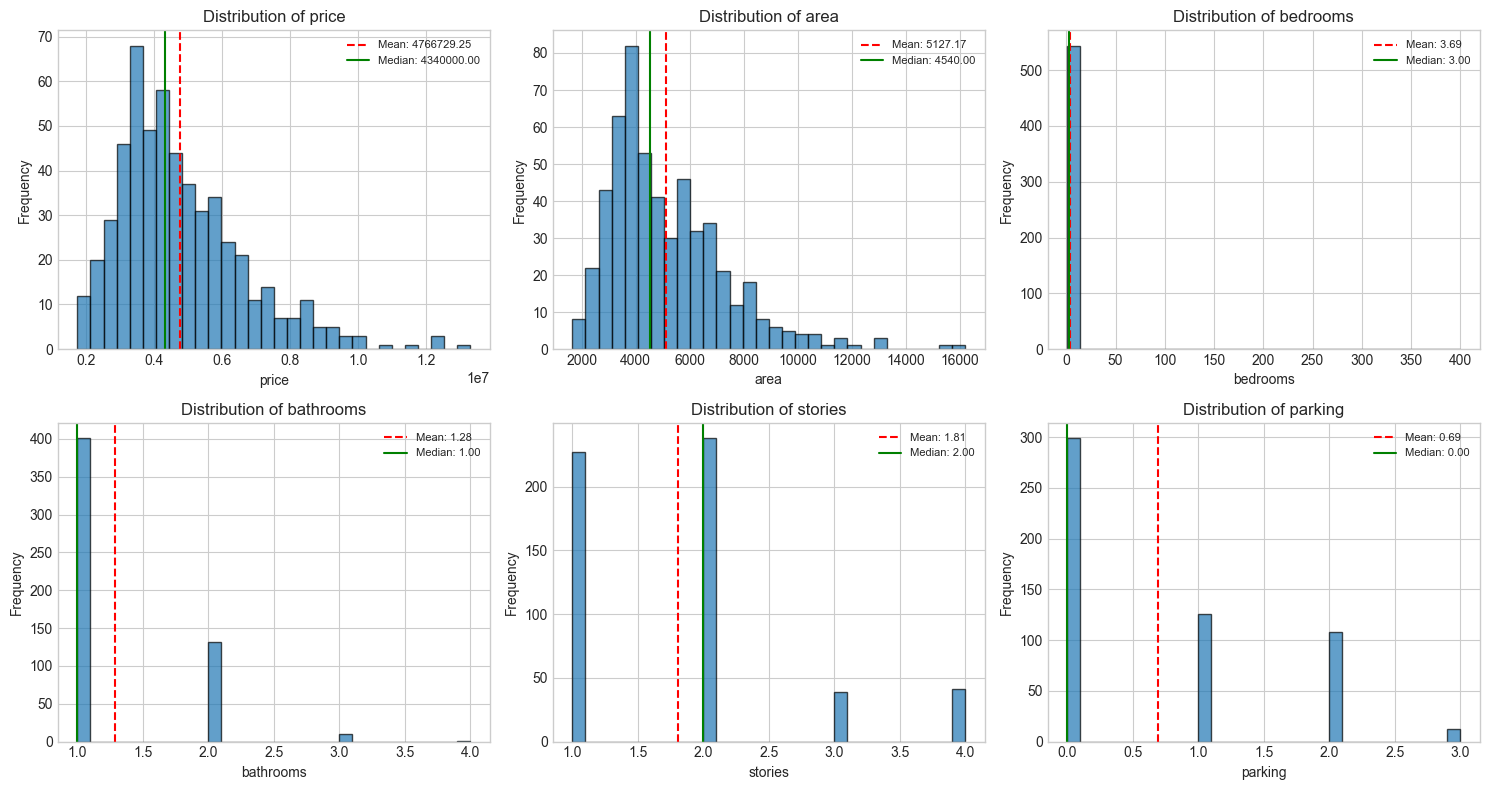

In [49]:
# Visualize distributions of numerical variables
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    axes[idx].legend(fontsize=8)

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('numerical_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

### 1b. Interpretation of Statistical Summary

**Interpretation Notes:** *(Update these based on your actual data)*

For each numerical variable, analyze:

1. **Central Tendency (Mean vs Median):**
   - If mean ≈ median: Distribution is approximately symmetric
   - If mean > median: Right-skewed (positive skew)
   - If mean < median: Left-skewed (negative skew)

2. **Spread (Standard Deviation):**
   - High std relative to mean indicates high variability
   - Low std indicates data points are clustered around the mean

3. **Skewness:**
   - |skewness| < 0.5: approximately symmetric
   - 0.5 < |skewness| < 1: moderately skewed
   - |skewness| > 1: highly skewed

4. **Kurtosis:**
   - kurtosis ≈ 0: normal distribution (mesokurtic)
   - kurtosis > 0: heavy tails, more outliers (leptokurtic)
   - kurtosis < 0: light tails, fewer outliers (platykurtic)

---

---
## 2. Handling Missing Values

### 2a. Detect Missing Values

MISSING VALUES ANALYSIS

Columns with Missing Values:
           Missing Count  Missing Percentage Data Type
area                   3            0.550459   float64
bathrooms              1            0.183486   float64


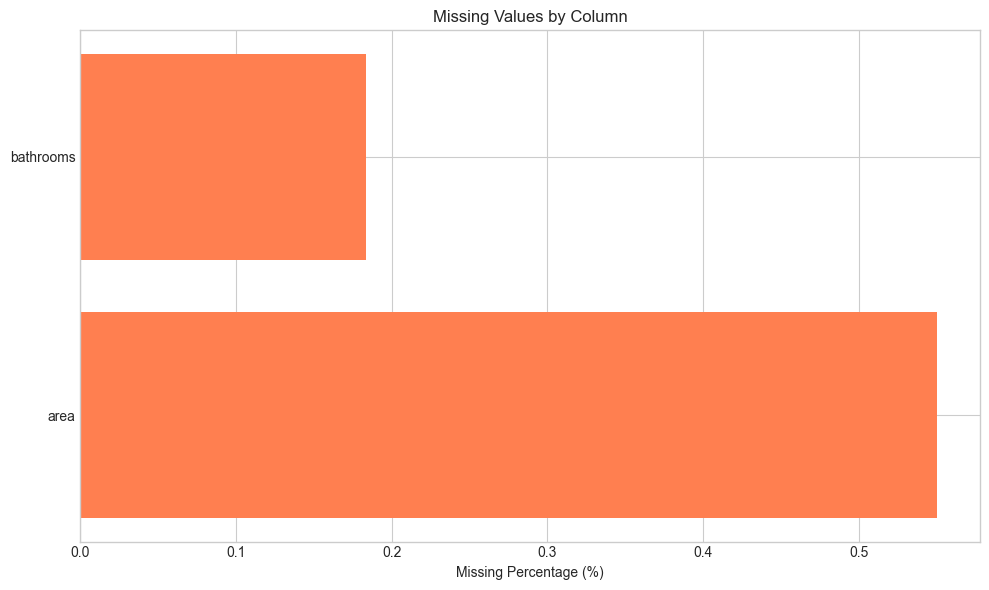

In [50]:
# Detect missing values
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

missing_info = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data Type': df.dtypes
})

missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False)

print("\nColumns with Missing Values:")
print(missing_info)

# Visualize missing values
if len(missing_info) > 0:
    plt.figure(figsize=(10, 6))
    plt.barh(missing_info.index, missing_info['Missing Percentage'], color='coral')
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.savefig('missing_values.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("\nNo missing values found in the dataset!")

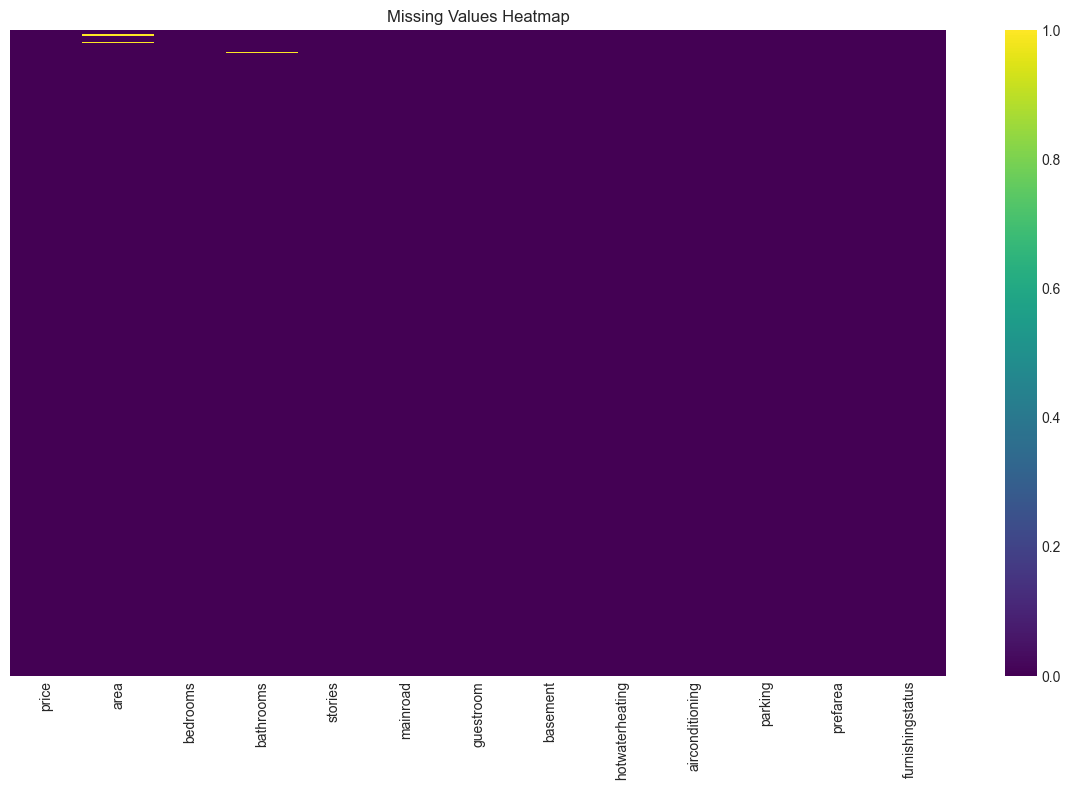

In [51]:
# Visualize missing value patterns using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.savefig('missing_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

### 2b & 2c. Apply Imputation Techniques with Justification

**Imputation Strategy Selection Guidelines:**

| Data Type | Distribution | Recommended Imputation |
|-----------|--------------|----------------------|
| Numerical | Normal/Symmetric | Mean |
| Numerical | Skewed | Median |
| Categorical | Any | Mode |
| Special cases | Domain-specific | Domain knowledge |

**Justification for each technique:**
- **Mean:** Best for normally distributed data without outliers
- **Median:** Robust to outliers, ideal for skewed distributions
- **Mode:** Appropriate for categorical data (most frequent value)
- **Domain-based:** When business logic dictates specific values

In [52]:
# BEFORE imputation - save state
print("="*60)
print("BEFORE IMPUTATION")
print("="*60)
print(f"Total missing values: {df.isnull().sum().sum()}")
print(df.isnull().sum()[df.isnull().sum() > 0])

BEFORE IMPUTATION
Total missing values: 4
area         3
bathrooms    1
dtype: int64


In [53]:
# Function to impute missing values based on data characteristics
def impute_missing_values(dataframe):
    """
    Impute missing values based on data type and distribution.
    Returns the imputed dataframe and a log of imputation methods used.
    """
    imputation_log = []
    
    for col in dataframe.columns:
        missing_count = dataframe[col].isnull().sum()
        
        if missing_count > 0:
            if dataframe[col].dtype in ['int64', 'float64']:
                # Check skewness to decide between mean and median
                skewness = dataframe[col].skew()
                
                if abs(skewness) < 0.5:
                    # Approximately symmetric - use mean
                    impute_value = dataframe[col].mean()
                    method = 'Mean (symmetric distribution)'
                else:
                    # Skewed - use median
                    impute_value = dataframe[col].median()
                    method = f'Median (skewed distribution, skewness={skewness:.2f})'
                
                dataframe[col].fillna(impute_value, inplace=True)
                
            else:
                # Categorical - use mode
                impute_value = dataframe[col].mode()[0]
                method = 'Mode (categorical variable)'
                dataframe[col].fillna(impute_value, inplace=True)
            
            imputation_log.append({
                'Column': col,
                'Missing Count': missing_count,
                'Imputation Method': method,
                'Imputed Value': impute_value
            })
    
    return dataframe, pd.DataFrame(imputation_log)

# Apply imputation
df, imputation_report = impute_missing_values(df)

print("="*60)
print("IMPUTATION REPORT")
print("="*60)
if len(imputation_report) > 0:
    print(imputation_report.to_string(index=False))
else:
    print("No imputation was necessary - no missing values found.")

IMPUTATION REPORT
   Column  Missing Count                           Imputation Method  Imputed Value
     area              3 Median (skewed distribution, skewness=1.31)         4540.0
bathrooms              1 Median (skewed distribution, skewness=1.60)            1.0


In [54]:
# AFTER imputation - verify
print("="*60)
print("AFTER IMPUTATION")
print("="*60)
print(f"Total missing values: {df.isnull().sum().sum()}")

if df.isnull().sum().sum() == 0:
    print("done-- All missing values have been successfully imputed!")

AFTER IMPUTATION
Total missing values: 0
done-- All missing values have been successfully imputed!


---
## 3. Detecting and Handling Duplicate Records

### 3a. Check for Duplicates

In [55]:
# Detect duplicates
print("="*60)
print("DUPLICATE RECORDS ANALYSIS")
print("="*60)

# Count total duplicates
total_duplicates = df.duplicated().sum()
print(f"\nTotal duplicate rows: {total_duplicates}")
print(f"Percentage of duplicates: {(total_duplicates/len(df))*100:.2f}%")

# Show duplicate rows if any
if total_duplicates > 0:
    print("\nDuplicate Rows:")
    print(df[df.duplicated(keep=False)].head(20))

DUPLICATE RECORDS ANALYSIS

Total duplicate rows: 0
Percentage of duplicates: 0.00%


### 3b & 3c. Handle Duplicates with Justification

**Decision Rationale:**
- **Remove duplicates** if they represent data entry errors or true redundant records
- **Keep duplicates** if they represent legitimate repeated observations (e.g., multiple transactions)

For housing data, duplicate records typically indicate:
1. Data entry errors (should be removed)
2. Multiple listings of the same property (depends on analysis goals)

**Our approach:** Remove exact duplicates as they likely represent data quality issues.

In [56]:
# BEFORE removing duplicates
print("="*60)
print("BEFORE REMOVING DUPLICATES")
print("="*60)
print(f"Total rows: {len(df)}")

BEFORE REMOVING DUPLICATES
Total rows: 545


In [57]:
# Remove duplicates
df_before_dedup = len(df)
df = df.drop_duplicates()
df_after_dedup = len(df)

print("="*60)
print("AFTER REMOVING DUPLICATES")
print("="*60)
print(f"Rows before: {df_before_dedup}")
print(f"Rows after: {df_after_dedup}")
print(f"Rows removed: {df_before_dedup - df_after_dedup}")

# Reset index after removing duplicates
df = df.reset_index(drop=True)
print("\ndone-- Index has been reset after duplicate removal.")

AFTER REMOVING DUPLICATES
Rows before: 545
Rows after: 545
Rows removed: 0

done-- Index has been reset after duplicate removal.


---
## 4. Detecting and Handling Data Inconsistency

### 4a. Identify Inconsistencies

We will check for:
1. Incorrect data types
2. Spelling variations in categorical values
3. Unrealistic values
4. Mixed units
5. Format inconsistencies

In [58]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")
print(f"Total categorical columns: {len(categorical_cols)}")

Categorical columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
Total categorical columns: 7


In [59]:
# Check unique values in categorical columns for spelling variations
print("="*60)
print("CATEGORICAL VALUES ANALYSIS")
print("="*60)

for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"\n{col} ({len(unique_vals)} unique values):")
    print(unique_vals[:20])  # Show first 20 unique values
    if len(unique_vals) > 20:
        print(f"... and {len(unique_vals) - 20} more")

CATEGORICAL VALUES ANALYSIS

mainroad (2 unique values):
['yes' 'no']

guestroom (2 unique values):
['no' 'yes']

basement (2 unique values):
['no' 'yes']

hotwaterheating (2 unique values):
['no' 'yes']

airconditioning (2 unique values):
['yes' 'no']

prefarea (2 unique values):
['yes' 'no']

furnishingstatus (3 unique values):
['furnished' 'semi-furnished' 'unfurnished']


In [60]:
# Check for inconsistencies in categorical data
def check_categorical_inconsistencies(dataframe, columns):
    """
    Check for potential spelling variations and inconsistencies
    """
    inconsistencies = []
    
    for col in columns:
        values = dataframe[col].dropna().astype(str).str.strip()
        
        # Check for case variations
        lower_values = values.str.lower()
        if len(lower_values.unique()) < len(values.unique()):
            inconsistencies.append({
                'Column': col,
                'Issue': 'Case variations detected',
                'Example': f"Original unique: {len(values.unique())}, After lowercase: {len(lower_values.unique())}"
            })
        
        # Check for leading/trailing whitespace
        stripped = values.str.strip()
        if not values.equals(stripped):
            inconsistencies.append({
                'Column': col,
                'Issue': 'Whitespace detected',
                'Example': 'Leading or trailing whitespace found'
            })
    
    return pd.DataFrame(inconsistencies)

inconsistency_report = check_categorical_inconsistencies(df, categorical_cols)
print("="*60)
print("INCONSISTENCY REPORT")
print("="*60)
if len(inconsistency_report) > 0:
    print(inconsistency_report.to_string(index=False))
else:
    print("No obvious inconsistencies detected in categorical columns.")

INCONSISTENCY REPORT
No obvious inconsistencies detected in categorical columns.


In [61]:
# Check for unrealistic values in numerical columns
print("="*60)
print("CHECKING FOR UNREALISTIC VALUES")
print("="*60)

# Update numerical_cols after potential changes
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numerical_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    
    # Check for negative values where they shouldn't exist
    # (e.g., prices, areas, number of rooms should be positive)
    negative_count = (df[col] < 0).sum()
    
    print(f"\n{col}:")
    print(f"  Range: [{min_val}, {max_val}]")
    if negative_count > 0:
        print(f"  issue --  WARNING: {negative_count} negative values found!")

CHECKING FOR UNREALISTIC VALUES

price:
  Range: [1750000, 13300000]

area:
  Range: [1650.0, 16200.0]

bedrooms:
  Range: [1, 400]

bathrooms:
  Range: [1.0, 4.0]

stories:
  Range: [1, 4]

parking:
  Range: [0, 3]


### 4b & 4c. Clean Inconsistencies

In [62]:
# BEFORE cleaning inconsistencies
print("="*60)
print("BEFORE CLEANING INCONSISTENCIES")
print("="*60)
for col in categorical_cols[:5]:  # Show first 5 categorical columns
    print(f"\n{col}: {df[col].nunique()} unique values")

BEFORE CLEANING INCONSISTENCIES

mainroad: 2 unique values

guestroom: 2 unique values

basement: 2 unique values

hotwaterheating: 2 unique values

airconditioning: 2 unique values


In [63]:
# Clean inconsistencies
def clean_inconsistencies(dataframe):
    """
    Clean common data inconsistencies
    """
    cleaning_log = []
    
    # Clean categorical columns
    for col in dataframe.select_dtypes(include=['object']).columns:
        original_unique = dataframe[col].nunique()
        
        # Strip whitespace
        dataframe[col] = dataframe[col].astype(str).str.strip()
        
        # Standardize case (title case for names, lower for others)
        # Adjust this based on your specific data
        dataframe[col] = dataframe[col].str.lower()
        
        new_unique = dataframe[col].nunique()
        
        if original_unique != new_unique:
            cleaning_log.append({
                'Column': col,
                'Action': 'Standardized text (lowercase + stripped whitespace)',
                'Unique values before': original_unique,
                'Unique values after': new_unique
            })
    
    return dataframe, pd.DataFrame(cleaning_log)

df, cleaning_report = clean_inconsistencies(df)

print("="*60)
print("CLEANING REPORT")
print("="*60)
if len(cleaning_report) > 0:
    print(cleaning_report.to_string(index=False))
else:
    print("No changes made during inconsistency cleaning.")

CLEANING REPORT
No changes made during inconsistency cleaning.


In [64]:
# AFTER cleaning inconsistencies
print("="*60)
print("AFTER CLEANING INCONSISTENCIES")
print("="*60)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols[:5]:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(f"  Values: {df[col].unique()[:10]}")

AFTER CLEANING INCONSISTENCIES

mainroad: 2 unique values
  Values: ['yes' 'no']

guestroom: 2 unique values
  Values: ['no' 'yes']

basement: 2 unique values
  Values: ['no' 'yes']

hotwaterheating: 2 unique values
  Values: ['no' 'yes']

airconditioning: 2 unique values
  Values: ['yes' 'no']


---
## 5. Detecting and Handling Outliers

### 5a. Outlier Detection Methods

We will use multiple methods:
1. **IQR Method** (Interquartile Range)
2. **Z-Score Method**
3. **Visualization** (Box plots)

In [65]:
# Update numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# IQR Method for outlier detection
def detect_outliers_iqr(dataframe, column):
    """
    Detect outliers using IQR method
    """
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    
    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': len(outliers),
        'Outlier Percentage': (len(outliers) / len(dataframe)) * 100
    }

# Z-Score Method for outlier detection
def detect_outliers_zscore(dataframe, column, threshold=3):
    """
    Detect outliers using Z-Score method
    """
    z_scores = np.abs(stats.zscore(dataframe[column].dropna()))
    outlier_count = (z_scores > threshold).sum()
    
    return {
        'Threshold': threshold,
        'Outlier Count': outlier_count,
        'Outlier Percentage': (outlier_count / len(dataframe)) * 100
    }

In [66]:
# Detect outliers in all numerical columns
print("="*60)
print("OUTLIER DETECTION RESULTS")
print("="*60)

outlier_results = []

for col in numerical_cols:
    iqr_result = detect_outliers_iqr(df, col)
    zscore_result = detect_outliers_zscore(df, col)
    
    outlier_results.append({
        'Column': col,
        'IQR Outliers': iqr_result['Outlier Count'],
        'IQR Outlier %': f"{iqr_result['Outlier Percentage']:.2f}%",
        'Z-Score Outliers': zscore_result['Outlier Count'],
        'Z-Score Outlier %': f"{zscore_result['Outlier Percentage']:.2f}%"
    })

outlier_df = pd.DataFrame(outlier_results)
print(outlier_df.to_string(index=False))

OUTLIER DETECTION RESULTS
   Column  IQR Outliers IQR Outlier %  Z-Score Outliers Z-Score Outlier %
    price            15         2.75%                 6             1.10%
     area            11         2.02%                 6             1.10%
 bedrooms            13         2.39%                 1             0.18%
bathrooms             1         0.18%                11             2.02%
  stories            41         7.52%                 0             0.00%
  parking            12         2.20%                 0             0.00%
   Column  IQR Outliers IQR Outlier %  Z-Score Outliers Z-Score Outlier %
    price            15         2.75%                 6             1.10%
     area            11         2.02%                 6             1.10%
 bedrooms            13         2.39%                 1             0.18%
bathrooms             1         0.18%                11             2.02%
  stories            41         7.52%                 0             0.00%
  parking   

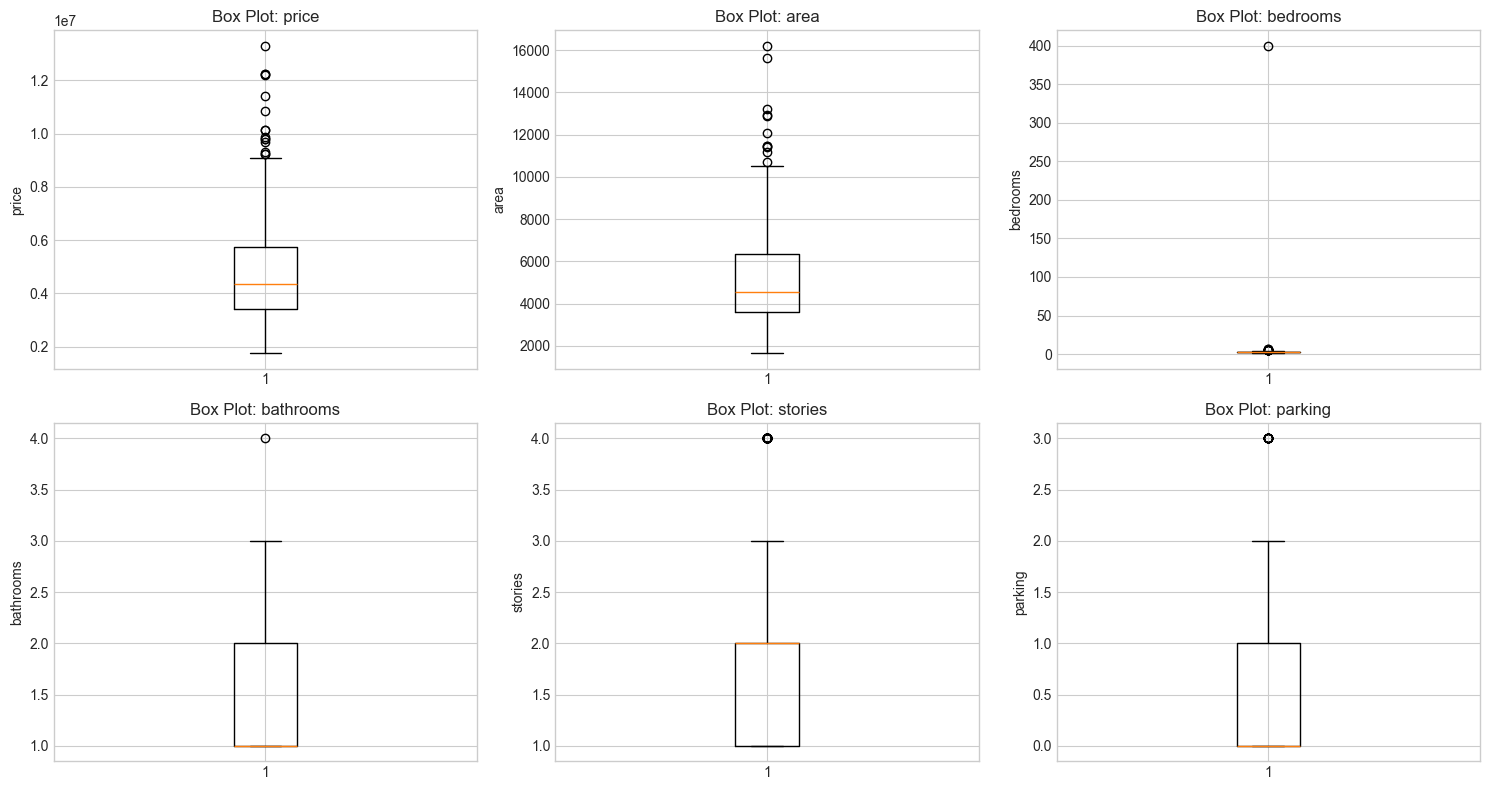

In [67]:
# Visualize outliers using box plots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'Box Plot: {col}')
    axes[idx].set_ylabel(col)

for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('outlier_boxplots.png', dpi=150, bbox_inches='tight')
plt.show()

### 5b & 5c. Handle Outliers with Justification

**Outlier Handling Strategies:**

| Strategy | When to Use |
|----------|-------------|
| **Remove** | Clear data errors, extreme outliers that skew analysis |
| **Winsorize** | Want to reduce outlier impact while keeping data points |
| **Keep** | Outliers represent valid extreme cases (e.g., luxury houses) |
| **Transform** | Apply log transformation to reduce skewness |

**Our Approach:** We will use **Winsorization** (capping at 1st and 99th percentiles) because:
1. It preserves data points (important for small datasets)
2. It reduces the impact of extreme values
3. It's appropriate for housing data where extreme prices may be valid

In [68]:
# BEFORE handling outliers
print("="*60)
print("BEFORE HANDLING OUTLIERS")
print("="*60)
print(df[numerical_cols].describe())

BEFORE HANDLING OUTLIERS
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5123.935780    3.691743    1.284404    1.805505   
std    1.870440e+06   2138.255747   17.023136    0.501684    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4540.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000  400.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [69]:
# Winsorization function
def winsorize_column(dataframe, column, lower_percentile=0.01, upper_percentile=0.99):
    """
    Winsorize a column by capping values at specified percentiles
    """
    lower_bound = dataframe[column].quantile(lower_percentile)
    upper_bound = dataframe[column].quantile(upper_percentile)
    
    before_outliers = ((dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)).sum()
    
    dataframe[column] = dataframe[column].clip(lower=lower_bound, upper=upper_bound)
    
    return before_outliers, lower_bound, upper_bound

# Apply winsorization to numerical columns with significant outliers
print("="*60)
print("WINSORIZATION RESULTS")
print("="*60)

winsorization_log = []

for col in numerical_cols:
    # Check if column has significant outliers (>1%)
    iqr_result = detect_outliers_iqr(df, col)
    
    if iqr_result['Outlier Percentage'] > 1:
        outliers_capped, lower, upper = winsorize_column(df, col)
        winsorization_log.append({
            'Column': col,
            'Outliers Capped': outliers_capped,
            'Lower Bound': lower,
            'Upper Bound': upper,
            'Justification': 'Outlier percentage > 1%, winsorized to reduce impact'
        })
        print(f"done-- {col}: {outliers_capped} outliers capped at [{lower:.2f}, {upper:.2f}]")
    else:
        print(f"○ {col}: No significant outliers, kept as is")

if winsorization_log:
    print("\n" + "="*60)
    winsorization_df = pd.DataFrame(winsorization_log)
    print(winsorization_df.to_string(index=False))

WINSORIZATION RESULTS
done-- price: 12 outliers capped at [1870400.00, 10542000.00]
done-- area: 12 outliers capped at [1972.00, 11812.80]
done-- bedrooms: 5 outliers capped at [2.00, 5.00]
○ bathrooms: No significant outliers, kept as is
done-- stories: 0 outliers capped at [1.00, 4.00]
done-- parking: 0 outliers capped at [0.00, 3.00]

  Column  Outliers Capped  Lower Bound  Upper Bound                                        Justification
   price               12    1870400.0   10542000.0 Outlier percentage > 1%, winsorized to reduce impact
    area               12       1972.0      11812.8 Outlier percentage > 1%, winsorized to reduce impact
bedrooms                5          2.0          5.0 Outlier percentage > 1%, winsorized to reduce impact
 stories                0          1.0          4.0 Outlier percentage > 1%, winsorized to reduce impact
 parking                0          0.0          3.0 Outlier percentage > 1%, winsorized to reduce impact
done-- parking: 0 outliers cap

In [70]:
# AFTER handling outliers
print("="*60)
print("AFTER HANDLING OUTLIERS")
print("="*60)
print(df[numerical_cols].describe())

AFTER HANDLING OUTLIERS
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.751146e+06   5103.355596    2.966972    1.284404    1.805505   
std    1.808191e+06   2048.204797    0.721780    0.501684    0.867492   
min    1.870400e+06   1972.000000    2.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4540.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.054200e+07  11812.800000    5.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


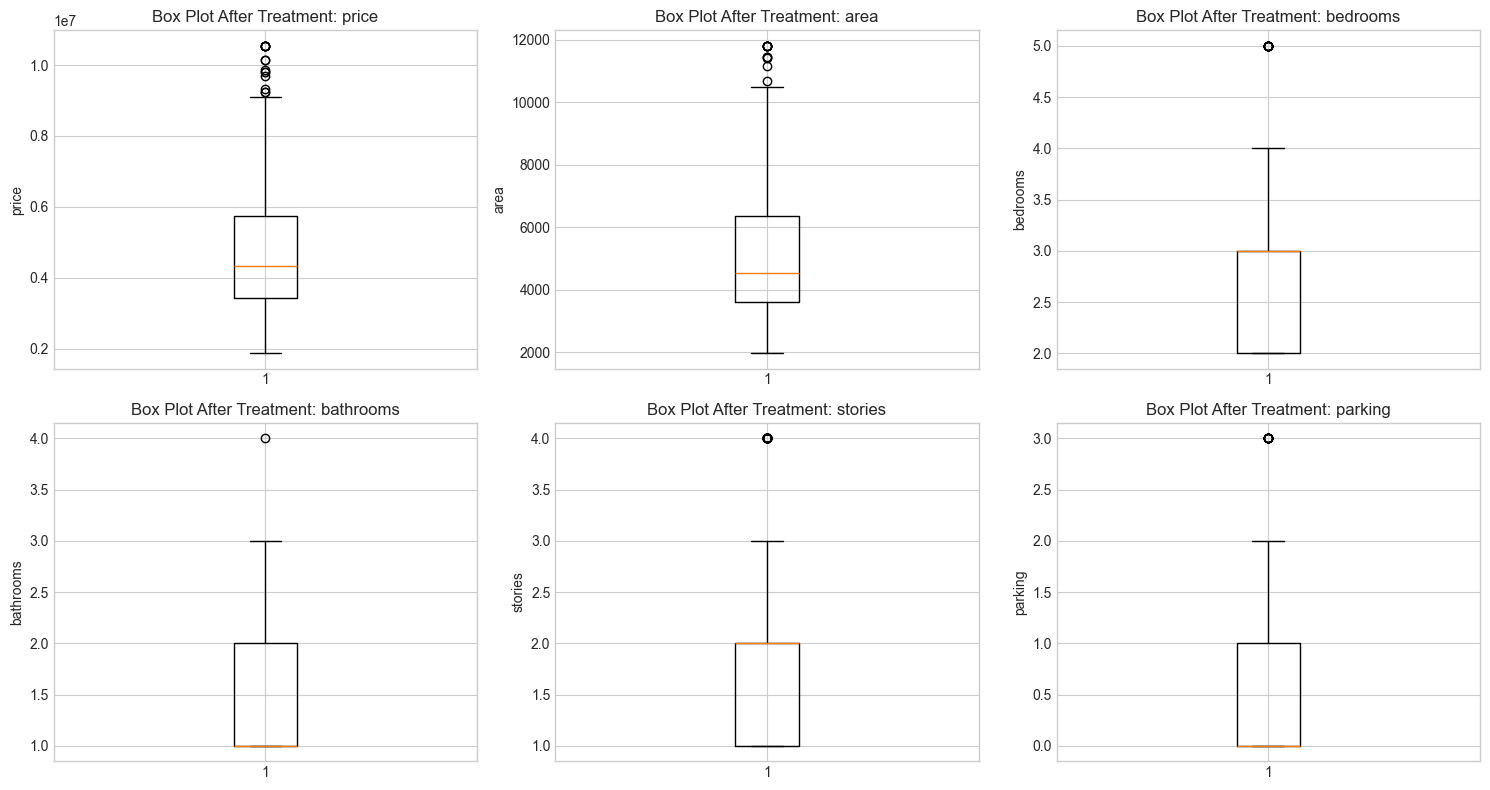

In [71]:
# Verify with box plots after outlier handling
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'Box Plot After Treatment: {col}')
    axes[idx].set_ylabel(col)

for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('outlier_boxplots_after.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 6. Normalization and Scaling

### 6a. Identify Variables Requiring Scaling

Variables that typically require scaling:
- Features with different units (e.g., area in sqft vs. number of rooms)
- Features with vastly different ranges
- When using distance-based algorithms (KNN, SVM, Neural Networks)
- When using regularization (Ridge, Lasso)

In [72]:
# Check the range of numerical variables
print("="*60)
print("VARIABLE RANGES BEFORE SCALING")
print("="*60)

range_info = pd.DataFrame({
    'Min': df[numerical_cols].min(),
    'Max': df[numerical_cols].max(),
    'Range': df[numerical_cols].max() - df[numerical_cols].min(),
    'Mean': df[numerical_cols].mean(),
    'Std': df[numerical_cols].std()
})

print(range_info)

VARIABLE RANGES BEFORE SCALING
                 Min         Max      Range          Mean           Std
price      1870400.0  10542000.0  8671600.0  4.751146e+06  1.808191e+06
area          1972.0     11812.8     9840.8  5.103356e+03  2.048205e+03
bedrooms         2.0         5.0        3.0  2.966972e+00  7.217797e-01
bathrooms        1.0         4.0        3.0  1.284404e+00  5.016836e-01
stories          1.0         4.0        3.0  1.805505e+00  8.674925e-01
parking          0.0         3.0        3.0  6.935780e-01  8.615858e-01


### 6b & 6c. Apply Scaling Techniques with Justification

**Scaling Techniques:**

| Technique | Formula | Best For |
|-----------|---------|----------|
| **Min-Max Scaling** | (x - min) / (max - min) | When you need values in [0,1], neural networks |
| **Standardization (Z-score)** | (x - mean) / std | Normal distribution assumed, SVM, Linear Regression |
| **Robust Scaling** | (x - median) / IQR | Data with outliers |

**Our Strategy:**
- Create separate scaled versions using each method
- Use **Standardization** as the primary method (most commonly used)
- Document transformations for each

In [73]:
# BEFORE scaling
print("="*60)
print("BEFORE SCALING")
print("="*60)
print(df[numerical_cols].describe())

BEFORE SCALING
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.751146e+06   5103.355596    2.966972    1.284404    1.805505   
std    1.808191e+06   2048.204797    0.721780    0.501684    0.867492   
min    1.870400e+06   1972.000000    2.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4540.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.054200e+07  11812.800000    5.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [74]:
# Create copies for different scaling methods
df_minmax = df.copy()
df_standard = df.copy()
df_robust = df.copy()

# Initialize scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Apply Min-Max Scaling
df_minmax[numerical_cols] = minmax_scaler.fit_transform(df_minmax[numerical_cols])

# Apply Standardization
df_standard[numerical_cols] = standard_scaler.fit_transform(df_standard[numerical_cols])

# Apply Robust Scaling
df_robust[numerical_cols] = robust_scaler.fit_transform(df_robust[numerical_cols])

print("done-- All scaling methods applied successfully!")

done-- All scaling methods applied successfully!


In [75]:
# Compare scaling results
print("="*60)
print("SCALING COMPARISON")
print("="*60)

print("\n1. MIN-MAX SCALING (Range: [0, 1])")
print(df_minmax[numerical_cols].describe().loc[['min', 'max', 'mean', 'std']])

print("\n2. STANDARDIZATION (Mean≈0, Std≈1)")
print(df_standard[numerical_cols].describe().loc[['min', 'max', 'mean', 'std']])

print("\n3. ROBUST SCALING (Based on median and IQR)")
print(df_robust[numerical_cols].describe().loc[['min', 'max', 'mean', 'std']])

SCALING COMPARISON

1. MIN-MAX SCALING (Range: [0, 1])
         price      area  bedrooms  bathrooms   stories   parking
min   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000
max   1.000000  1.000000  1.000000   1.000000  1.000000  1.000000
mean  0.332205  0.318201  0.322324   0.094801  0.268502  0.231193
std   0.208519  0.208134  0.240593   0.167228  0.289164  0.287195

2. STANDARDIZATION (Mean≈0, Std≈1)
             price          area      bedrooms     bathrooms       stories  \
min  -1.594628e+00 -1.530234e+00 -1.340937e+00 -5.674193e-01 -9.293967e-01   
max   3.205509e+00  3.278778e+00  2.819275e+00  5.417939e+00  2.532024e+00   
mean -1.564498e-16 -2.085997e-16 -1.303748e-16 -1.825247e-16 -1.303748e-16   
std   1.000919e+00  1.000919e+00  1.000919e+00  1.000919e+00  1.000919e+00   

       parking  
min  -0.805741  
max   2.679409  
mean  0.000000  
std   1.000919  

3. ROBUST SCALING (Based on median and IQR)
         price      area  bedrooms  bathrooms   stories   

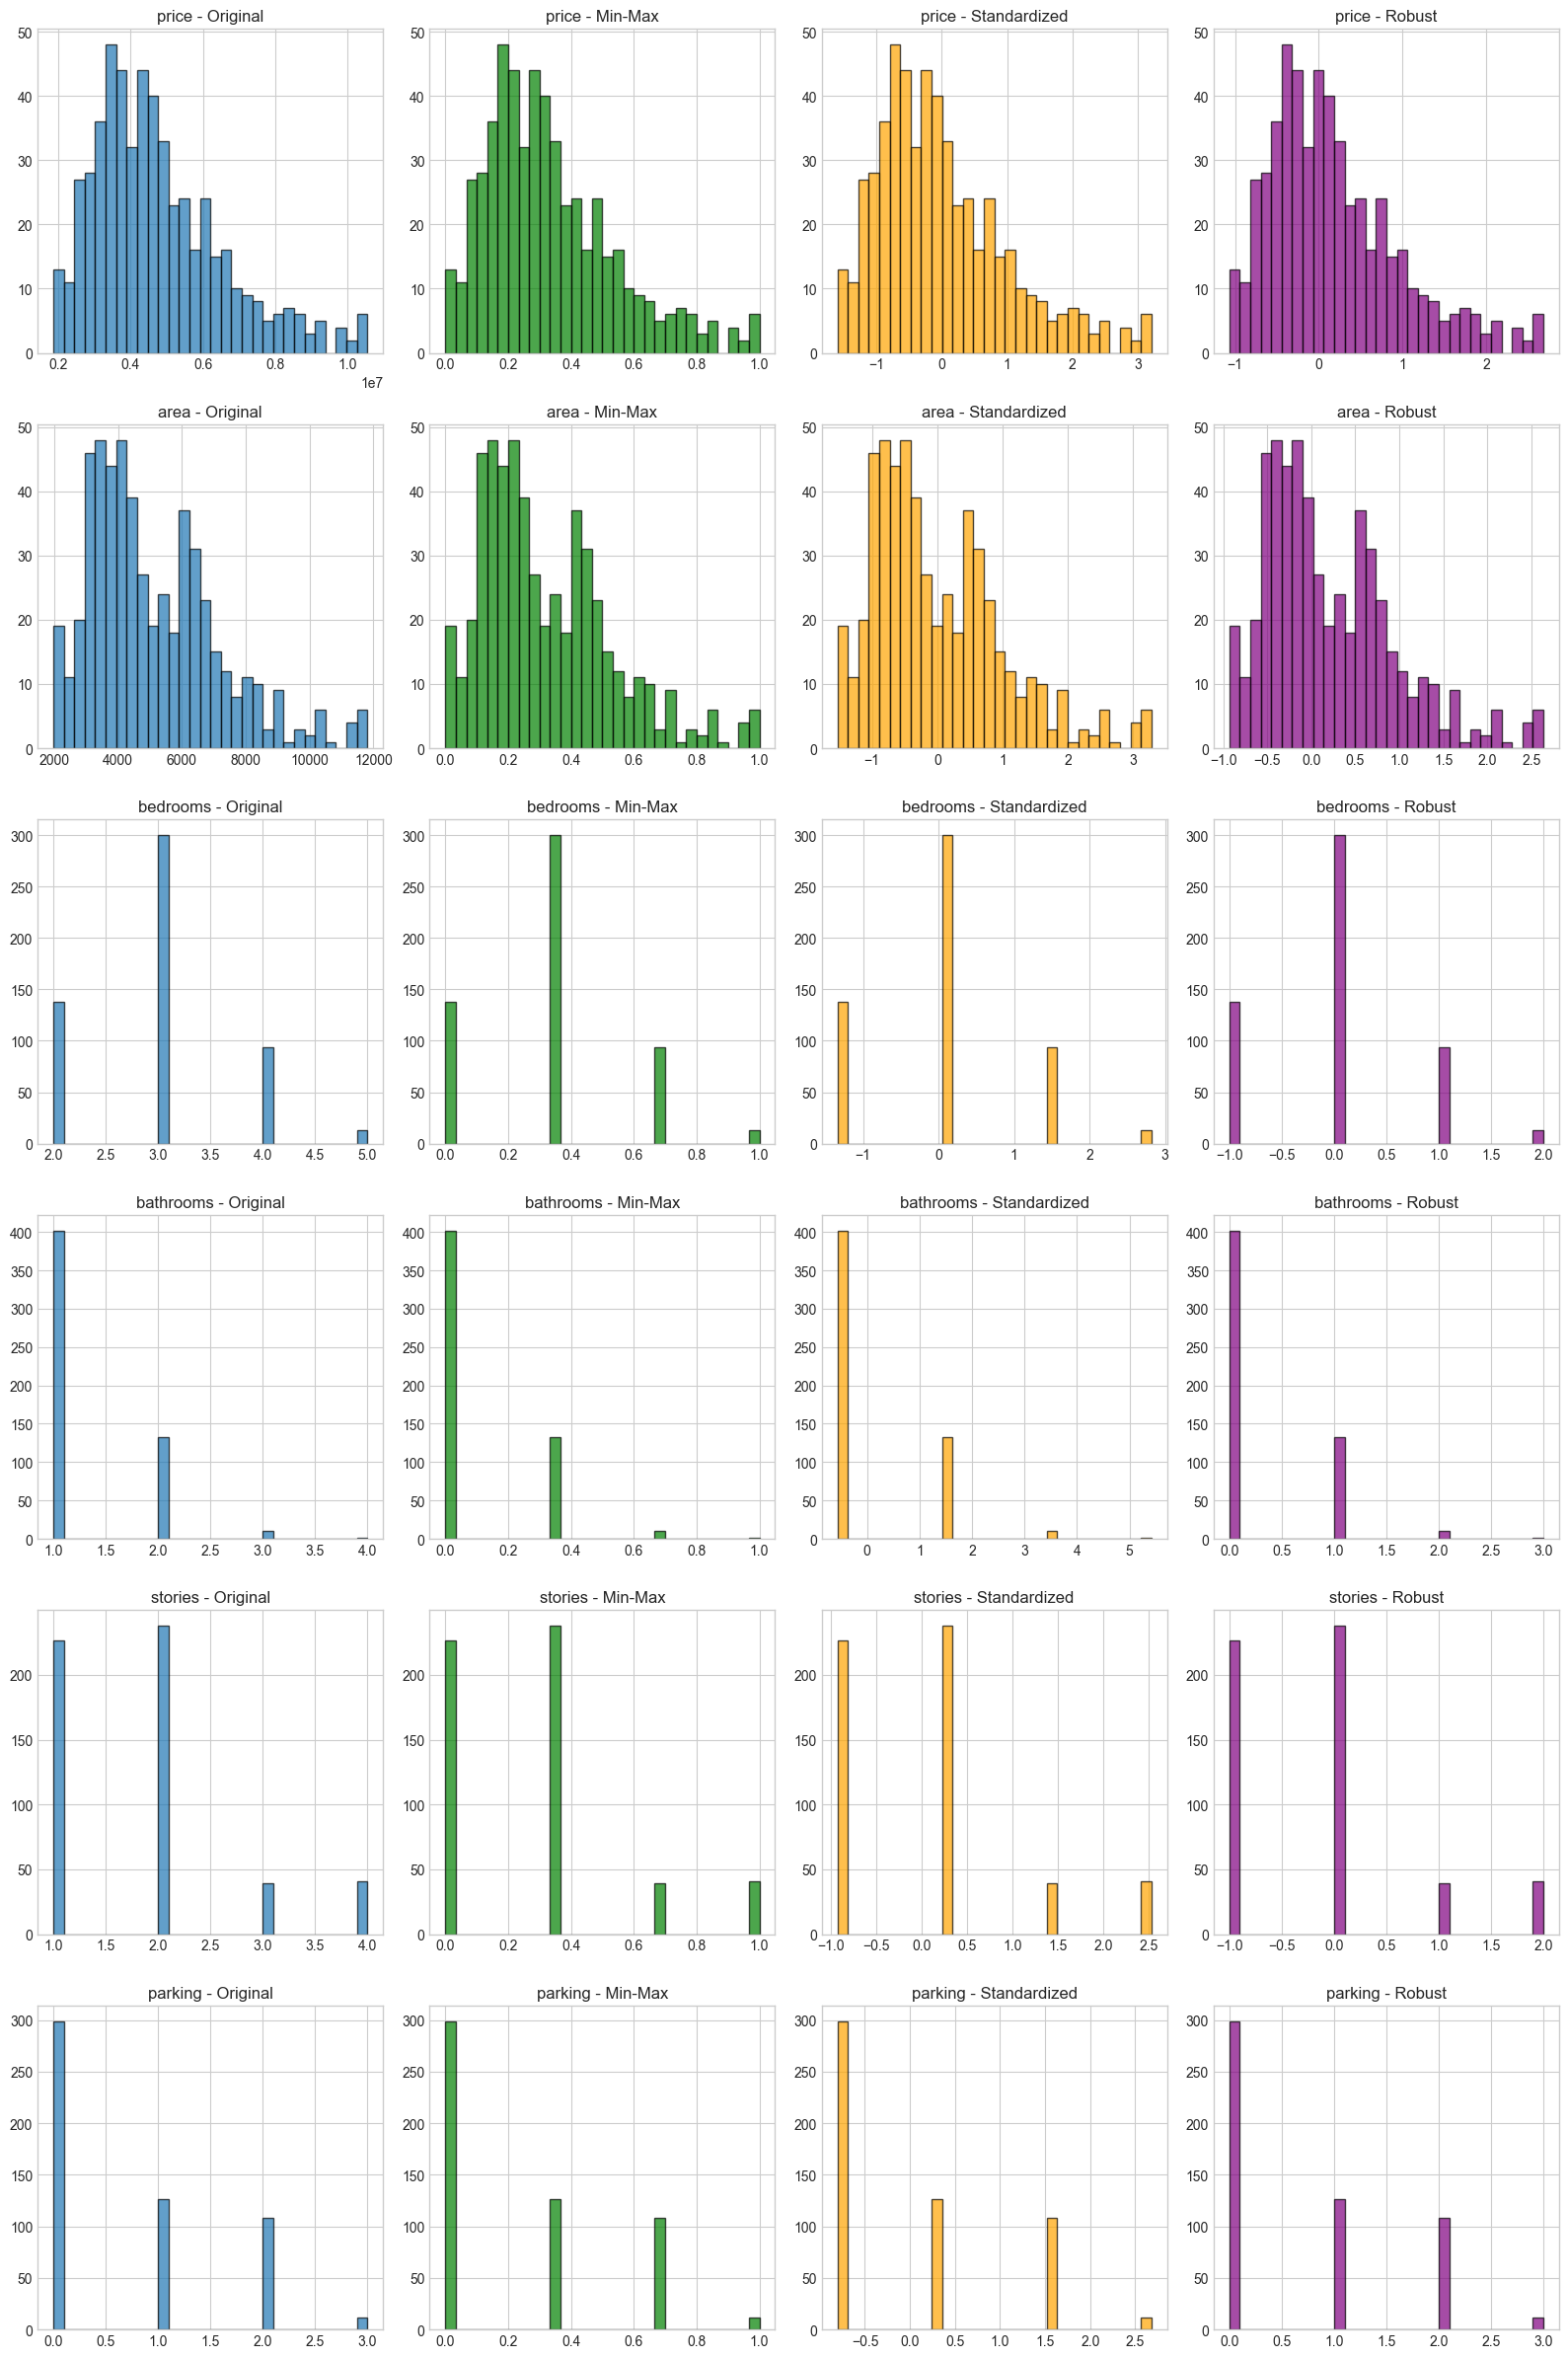

In [76]:
# Visualize the effect of different scaling methods
fig, axes = plt.subplots(len(numerical_cols), 4, figsize=(16, 4*len(numerical_cols)))

for idx, col in enumerate(numerical_cols):
    # Original
    axes[idx, 0].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx, 0].set_title(f'{col} - Original')
    
    # Min-Max
    axes[idx, 1].hist(df_minmax[col], bins=30, edgecolor='black', alpha=0.7, color='green')
    axes[idx, 1].set_title(f'{col} - Min-Max')
    
    # Standard
    axes[idx, 2].hist(df_standard[col], bins=30, edgecolor='black', alpha=0.7, color='orange')
    axes[idx, 2].set_title(f'{col} - Standardized')
    
    # Robust
    axes[idx, 3].hist(df_robust[col], bins=30, edgecolor='black', alpha=0.7, color='purple')
    axes[idx, 3].set_title(f'{col} - Robust')

plt.tight_layout()
plt.savefig('scaling_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

In [77]:
# Use Standardization as the primary scaled dataset
df_scaled = df_standard.copy()

print("="*60)
print("FINAL SCALED DATASET (Standardization)")
print("="*60)
print("\nJustification: Standardization (Z-score) is chosen because:")
print("1. It centers data around 0 with unit variance")
print("2. It's widely used for many ML algorithms")
print("3. It preserves the shape of the original distribution")
print("4. It handles negative values naturally")
print("\n", df_scaled[numerical_cols].describe())

FINAL SCALED DATASET (Standardization)

Justification: Standardization (Z-score) is chosen because:
1. It centers data around 0 with unit variance
2. It's widely used for many ML algorithms
3. It preserves the shape of the original distribution
4. It handles negative values naturally

               price          area      bedrooms     bathrooms       stories  \
count  5.450000e+02  5.450000e+02  5.450000e+02  5.450000e+02  5.450000e+02   
mean  -1.564498e-16 -2.085997e-16 -1.303748e-16 -1.825247e-16 -1.303748e-16   
std    1.000919e+00  1.000919e+00  1.000919e+00  1.000919e+00  1.000919e+00   
min   -1.594628e+00 -1.530234e+00 -1.340937e+00 -5.674193e-01 -9.293967e-01   
25%   -7.313164e-01 -7.346613e-01 -1.340937e+00 -5.674193e-01 -9.293967e-01   
50%   -2.275887e-01 -2.753012e-01  4.580049e-02 -5.674193e-01  2.244101e-01   
75%    5.473769e-01  6.140982e-01  4.580049e-02  1.427700e+00  2.244101e-01   
max    3.205509e+00  3.278778e+00  2.819275e+00  5.417939e+00  2.532024e+00   

 

---
## 7. Encoding Categorical Variables

### Theoretical Background

**Encoding techniques convert categorical data into numerical format for machine learning algorithms.**

#### 7.1 Label Encoding
- Assigns a unique integer to each category
- **Best for:** Ordinal data (categories with natural order)
- **Drawback:** Can imply false ordinal relationships

#### 7.2 One-Hot Encoding
- Creates binary columns for each category
- **Best for:** Nominal data without order, low cardinality
- **Drawback:** Can lead to high dimensionality (curse of dimensionality)

#### 7.3 Binary Encoding
- Converts categories to binary representation
- **Best for:** High cardinality categorical features
- **Advantage:** Reduces dimensionality compared to one-hot encoding

#### 7.4 Ordinal Encoding
- Similar to label encoding but with explicit ordering
- **Best for:** Ordinal data with known rank order

#### 7.5 Target Encoding
- Replaces categories with target variable statistics
- **With smoothing:** Reduces overfitting by blending with global mean
- **Best for:** High cardinality features in supervised learning
- **Drawback:** Risk of data leakage if not done carefully

In [78]:
# Identify categorical columns for encoding
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("="*60)
print("CATEGORICAL COLUMNS FOR ENCODING")
print("="*60)

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Sample values: {df[col].unique()[:5]}")

CATEGORICAL COLUMNS FOR ENCODING

mainroad:
  Unique values: 2
  Sample values: ['yes' 'no']

guestroom:
  Unique values: 2
  Sample values: ['no' 'yes']

basement:
  Unique values: 2
  Sample values: ['no' 'yes']

hotwaterheating:
  Unique values: 2
  Sample values: ['no' 'yes']

airconditioning:
  Unique values: 2
  Sample values: ['yes' 'no']

prefarea:
  Unique values: 2
  Sample values: ['yes' 'no']

furnishingstatus:
  Unique values: 3
  Sample values: ['furnished' 'semi-furnished' 'unfurnished']


### 7.1 Label Encoding

**Description:** Assigns integers (0, 1, 2, ...) to each unique category.

**When to use:**
- Ordinal variables with clear ranking
- Tree-based models (can handle label encoding well)
- When memory/dimensionality is a concern

In [79]:
# Label Encoding
print("="*60)
print("LABEL ENCODING")
print("="*60)

df_label_encoded = df.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_label_encoded[col + '_label'] = le.fit_transform(df_label_encoded[col].astype(str))
    label_encoders[col] = le
    
    print(f"\n{col} -> {col}_label")
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"  Mapping: {mapping}")

print("\ndone-- Label encoding completed!")
print(df_label_encoded.head())

LABEL ENCODING

mainroad -> mainroad_label
  Mapping: {'no': np.int64(0), 'yes': np.int64(1)}

guestroom -> guestroom_label
  Mapping: {'no': np.int64(0), 'yes': np.int64(1)}

basement -> basement_label
  Mapping: {'no': np.int64(0), 'yes': np.int64(1)}

hotwaterheating -> hotwaterheating_label
  Mapping: {'no': np.int64(0), 'yes': np.int64(1)}

airconditioning -> airconditioning_label
  Mapping: {'no': np.int64(0), 'yes': np.int64(1)}

prefarea -> prefarea_label
  Mapping: {'no': np.int64(0), 'yes': np.int64(1)}

furnishingstatus -> furnishingstatus_label
  Mapping: {'furnished': np.int64(0), 'semi-furnished': np.int64(1), 'unfurnished': np.int64(2)}

done-- Label encoding completed!
        price    area  bedrooms  bathrooms  stories mainroad guestroom  \
0  10542000.0  7420.0         4        2.0        3      yes        no   
1  10542000.0  8960.0         4        4.0        4      yes        no   
2  10542000.0  9960.0         3        2.0        2      yes        no   
3  1054200

### 7.2 One-Hot Encoding

**Description:** Creates a new binary column for each category.

**When to use:**
- Nominal variables without inherent order
- Low cardinality (few unique values)
- Linear models, neural networks

In [80]:
# One-Hot Encoding
print("="*60)
print("ONE-HOT ENCODING")
print("="*60)

df_onehot_encoded = df.copy()

# Apply one-hot encoding
df_onehot_encoded = pd.get_dummies(df_onehot_encoded, columns=categorical_cols, prefix=categorical_cols)

print(f"\nShape before one-hot encoding: {df.shape}")
print(f"Shape after one-hot encoding: {df_onehot_encoded.shape}")
print(f"New columns created: {df_onehot_encoded.shape[1] - df.shape[1] + len(categorical_cols)}")

print("\nNew column names (sample):")
onehot_cols = [col for col in df_onehot_encoded.columns if any(cat in col for cat in categorical_cols)]
print(onehot_cols[:15])

print("\ndone-- One-hot encoding completed!")
df_onehot_encoded.head()

ONE-HOT ENCODING

Shape before one-hot encoding: (545, 13)
Shape after one-hot encoding: (545, 21)
New columns created: 15

New column names (sample):
['mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes', 'basement_no', 'basement_yes', 'hotwaterheating_no', 'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes', 'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']

done-- One-hot encoding completed!

Shape before one-hot encoding: (545, 13)
Shape after one-hot encoding: (545, 21)
New columns created: 15

New column names (sample):
['mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes', 'basement_no', 'basement_yes', 'hotwaterheating_no', 'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes', 'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']

done-- One-hot encoding completed!


,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,10542000.0,7420.0,4,2.0,3,2,False,True,True,False,True,False,True,False,False,True,False,True,True,False,False
1,10542000.0,8960.0,4,4.0,4,3,False,True,True,False,True,False,True,False,False,True,True,False,True,False,False
2,10542000.0,9960.0,3,2.0,2,2,False,True,True,False,False,True,True,False,True,False,False,True,False,True,False
3,10542000.0,4540.0,4,2.0,2,3,False,True,True,False,False,True,True,False,False,True,False,True,True,False,False
4,10542000.0,4540.0,4,1.0,2,2,False,True,False,True,False,True,True,False,False,True,True,False,True,False,False


### 7.3 Binary Encoding

**Description:** Converts categories to integers, then to binary representation.

**When to use:**
- High cardinality categorical features
- When one-hot encoding would create too many columns
- More memory efficient than one-hot encoding

In [81]:
# Binary Encoding
print("="*60)
print("BINARY ENCODING")
print("="*60)

df_binary_encoded = df.copy()

# Using category_encoders library
binary_encoder = ce.BinaryEncoder(cols=categorical_cols)
df_binary_encoded = binary_encoder.fit_transform(df_binary_encoded)

print(f"\nShape before binary encoding: {df.shape}")
print(f"Shape after binary encoding: {df_binary_encoded.shape}")

print("\nBinary encoded columns:")
binary_cols = [col for col in df_binary_encoded.columns if any(cat in col for cat in categorical_cols)]
print(binary_cols)

print("\ndone-- Binary encoding completed!")
df_binary_encoded.head()

BINARY ENCODING

Shape before binary encoding: (545, 13)
Shape after binary encoding: (545, 20)

Binary encoded columns:
['mainroad_0', 'mainroad_1', 'guestroom_0', 'guestroom_1', 'basement_0', 'basement_1', 'hotwaterheating_0', 'hotwaterheating_1', 'airconditioning_0', 'airconditioning_1', 'prefarea_0', 'prefarea_1', 'furnishingstatus_0', 'furnishingstatus_1']

done-- Binary encoding completed!

Shape before binary encoding: (545, 13)
Shape after binary encoding: (545, 20)

Binary encoded columns:
['mainroad_0', 'mainroad_1', 'guestroom_0', 'guestroom_1', 'basement_0', 'basement_1', 'hotwaterheating_0', 'hotwaterheating_1', 'airconditioning_0', 'airconditioning_1', 'prefarea_0', 'prefarea_1', 'furnishingstatus_0', 'furnishingstatus_1']

done-- Binary encoding completed!


,price,area,bedrooms,bathrooms,stories,mainroad_0,mainroad_1,guestroom_0,guestroom_1,basement_0,basement_1,hotwaterheating_0,hotwaterheating_1,airconditioning_0,airconditioning_1,parking,prefarea_0,prefarea_1,furnishingstatus_0,furnishingstatus_1
0,10542000.0,7420.0,4,2.0,3,0,1,0,1,0,1,0,1,0,1,2,0,1,0,1
1,10542000.0,8960.0,4,4.0,4,0,1,0,1,0,1,0,1,0,1,3,1,0,0,1
2,10542000.0,9960.0,3,2.0,2,0,1,0,1,1,0,0,1,1,0,2,0,1,1,0
3,10542000.0,4540.0,4,2.0,2,0,1,0,1,1,0,0,1,0,1,3,0,1,0,1
4,10542000.0,4540.0,4,1.0,2,0,1,1,0,1,0,0,1,0,1,2,1,0,0,1


### 7.4 Ordinal Encoding

**Description:** Assigns integers based on a predefined order of categories.

**When to use:**
- Ordinal variables with clear ranking (e.g., Low < Medium < High)
- When the order carries meaningful information

In [82]:
# Ordinal Encoding
print("="*60)
print("ORDINAL ENCODING")
print("="*60)

df_ordinal_encoded = df.copy()
ordinal_mappings = {}

# Check if there are any obvious ordinal columns and create mappings
for col in categorical_cols:
    unique_vals = df[col].unique()
    
    # Create a simple ordinal mapping (you should customize this based on domain knowledge)
    ordinal_mappings[col] = {val: idx for idx, val in enumerate(sorted(unique_vals))}
    
    df_ordinal_encoded[col + '_ordinal'] = df_ordinal_encoded[col].map(ordinal_mappings[col])
    
    print(f"\n{col} -> {col}_ordinal")
    print(f"  Mapping: {ordinal_mappings[col]}")

print("\ndone-- Ordinal encoding completed!")
df_ordinal_encoded.head()

ORDINAL ENCODING

mainroad -> mainroad_ordinal
  Mapping: {'no': 0, 'yes': 1}

guestroom -> guestroom_ordinal
  Mapping: {'no': 0, 'yes': 1}

basement -> basement_ordinal
  Mapping: {'no': 0, 'yes': 1}

hotwaterheating -> hotwaterheating_ordinal
  Mapping: {'no': 0, 'yes': 1}

airconditioning -> airconditioning_ordinal
  Mapping: {'no': 0, 'yes': 1}

prefarea -> prefarea_ordinal
  Mapping: {'no': 0, 'yes': 1}

furnishingstatus -> furnishingstatus_ordinal
  Mapping: {'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2}

done-- Ordinal encoding completed!


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_ordinal,guestroom_ordinal,basement_ordinal,hotwaterheating_ordinal,airconditioning_ordinal,prefarea_ordinal,furnishingstatus_ordinal
0,10542000.0,7420.0,4,2.0,3,yes,no,no,no,yes,2,yes,furnished,1,0,0,0,1,1,0
1,10542000.0,8960.0,4,4.0,4,yes,no,no,no,yes,3,no,furnished,1,0,0,0,1,0,0
2,10542000.0,9960.0,3,2.0,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0,1,0,0,1,1
3,10542000.0,4540.0,4,2.0,2,yes,no,yes,no,yes,3,yes,furnished,1,0,1,0,1,1,0
4,10542000.0,4540.0,4,1.0,2,yes,yes,yes,no,yes,2,no,furnished,1,1,1,0,1,0,0


### 7.5 Target Encoding

**Description:** Replaces categories with the mean (or other statistic) of the target variable.

**With Smoothing:** Blends category mean with global mean to reduce overfitting.

**When to use:**
- High cardinality features in supervised learning
- When relationship between category and target is important
- Requires a target variable

In [83]:
# Target Encoding
print("="*60)
print("TARGET ENCODING")
print("="*60)


df_target_encoded = df.copy()

potential_targets = [col for col in numerical_cols if 'price' in col.lower() or 'value' in col.lower()]

if potential_targets:
    target_column = potential_targets[0]
else:
    # Use the first numerical column as target (adjust as needed)
    target_column = numerical_cols[0] if numerical_cols else None

if target_column:
    print(f"Using '{target_column}' as target variable for target encoding")
    
    # Target Encoding WITHOUT smoothing
    target_encoder_no_smooth = ce.TargetEncoder(cols=categorical_cols, smoothing=0)
    df_target_no_smooth = target_encoder_no_smooth.fit_transform(df[categorical_cols], df[target_column])
    df_target_no_smooth.columns = [col + '_target_nosmooth' for col in categorical_cols]
    
    # Target Encoding WITH smoothing
    target_encoder_smooth = ce.TargetEncoder(cols=categorical_cols, smoothing=1.0)
    df_target_smooth = target_encoder_smooth.fit_transform(df[categorical_cols], df[target_column])
    df_target_smooth.columns = [col + '_target_smooth' for col in categorical_cols]
    
    # Combine with original dataframe
    df_target_encoded = pd.concat([df_target_encoded, df_target_no_smooth, df_target_smooth], axis=1)
    
    print("\nTarget Encoding Results (sample):")
    print("\nWithout Smoothing:")
    print(df_target_no_smooth.head())
    print("\nWith Smoothing:")
    print(df_target_smooth.head())
    
    print("\ndone-- Target encoding completed!")
else:
    print("No suitable target column found. Please specify the target column manually.")

TARGET ENCODING
Using 'price' as target variable for target encoding

Target Encoding Results (sample):

Without Smoothing:
   mainroad_target_nosmooth  guestroom_target_nosmooth  \
0              4.973120e+06               4.527526e+06   
1              4.973120e+06               4.527526e+06   
2              4.973120e+06               4.527526e+06   
3              4.973120e+06               4.527526e+06   
4              4.973120e+06               5.783948e+06   

   basement_target_nosmooth  hotwaterheating_target_nosmooth  \
0              4.498706e+06                     4.712261e+06   
1              4.498706e+06                     4.712261e+06   
2              5.219020e+06                     4.712261e+06   
3              5.219020e+06                     4.712261e+06   
4              5.219020e+06                     4.712261e+06   

   airconditioning_target_nosmooth  prefarea_target_nosmooth  \
0                     5.970692e+06              5.828679e+06   
1             

### Encoding Summary and Comparison

In [84]:
# Summary of all encoding methods
print("="*60)
print("ENCODING METHODS SUMMARY")
print("="*60)

encoding_summary = pd.DataFrame({
    'Method': ['Label Encoding', 'One-Hot Encoding', 'Binary Encoding', 'Ordinal Encoding', 'Target Encoding'],
    'Original Shape': [df.shape] * 5,
    'Encoded Shape': [
        df_label_encoded.shape,
        df_onehot_encoded.shape,
        df_binary_encoded.shape,
        df_ordinal_encoded.shape,
        df_target_encoded.shape
    ],
    'Best For': [
        'Tree-based models, ordinal data',
        'Linear models, low cardinality',
        'High cardinality features',
        'Ordered categorical data',
        'Supervised learning, high cardinality'
    ],
    'Pros': [
        'Simple, memory efficient',
        'No ordinal assumption',
        'Compact, memory efficient',
        'Preserves order information',
        'Captures relationship with target'
    ],
    'Cons': [
        'Implies false ordering',
        'High dimensionality',
        'Less interpretable',
        'Requires domain knowledge',
        'Risk of data leakage'
    ]
})

print(encoding_summary.to_string(index=False))

ENCODING METHODS SUMMARY
          Method Original Shape Encoded Shape                              Best For                              Pros                      Cons
  Label Encoding      (545, 13)     (545, 20)       Tree-based models, ordinal data          Simple, memory efficient    Implies false ordering
One-Hot Encoding      (545, 13)     (545, 21)        Linear models, low cardinality             No ordinal assumption       High dimensionality
 Binary Encoding      (545, 13)     (545, 20)             High cardinality features         Compact, memory efficient        Less interpretable
Ordinal Encoding      (545, 13)     (545, 20)              Ordered categorical data       Preserves order information Requires domain knowledge
 Target Encoding      (545, 13)     (545, 27) Supervised learning, high cardinality Captures relationship with target      Risk of data leakage


---
## 8. Final Cleaned Dataset

In [85]:
# Prepare final cleaned dataset
# Choose the encoding method based on your needs
# Here we use One-Hot Encoding as the default for the final dataset

print("="*60)
print("PREPARING FINAL CLEANED DATASET")
print("="*60)

# Start with the scaled dataset (standardized)
df_final = df_scaled.copy()

# Apply one-hot encoding for categorical variables
categorical_cols_final = df_final.select_dtypes(include=['object']).columns.tolist()
if categorical_cols_final:
    df_final = pd.get_dummies(df_final, columns=categorical_cols_final)

print(f"\nFinal dataset shape: {df_final.shape}")
print(f"Final dataset columns: {df_final.columns.tolist()}")

PREPARING FINAL CLEANED DATASET

Final dataset shape: (545, 21)
Final dataset columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes', 'basement_no', 'basement_yes', 'hotwaterheating_no', 'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes', 'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']


In [86]:
# Final data quality check
print("="*60)
print("FINAL DATA QUALITY CHECK")
print("="*60)

print(f"\n1. Missing Values: {df_final.isnull().sum().sum()}")
print(f"2. Duplicate Rows: {df_final.duplicated().sum()}")
print(f"3. Total Rows: {len(df_final)}")
print(f"4. Total Columns: {len(df_final.columns)}")
print(f"5. Data Types:\n{df_final.dtypes.value_counts()}")

# Verify all columns are numerical
non_numeric = df_final.select_dtypes(include=['object']).columns.tolist()
if len(non_numeric) == 0:
    print("\ndone-- All columns are numerical - dataset is ready for modeling!")
else:
    print(f"\nissue --  Non-numerical columns remaining: {non_numeric}")

FINAL DATA QUALITY CHECK

1. Missing Values: 0
2. Duplicate Rows: 0
3. Total Rows: 545
4. Total Columns: 21
5. Data Types:
bool       15
float64     6
Name: count, dtype: int64

done-- All columns are numerical - dataset is ready for modeling!
2. Duplicate Rows: 0
3. Total Rows: 545
4. Total Columns: 21
5. Data Types:
bool       15
float64     6
Name: count, dtype: int64

done-- All columns are numerical - dataset is ready for modeling!


In [87]:
# Save cleaned datasets
print("="*60)
print("SAVING CLEANED DATASETS")
print("="*60)

# Save the final cleaned and encoded dataset
df_final.to_csv('house_cleaned_final.csv', index=False)
print(" Saved: house_cleaned_final.csv (scaled + one-hot encoded)")

# Save cleaned but unscaled version
df.to_csv('house_cleaned_unscaled.csv', index=False)
print(" Saved: house_cleaned_unscaled.csv (cleaned, not scaled)")
# Save different encoded versions
df_label_encoded.to_csv('house_label_encoded.csv', index=False)
print("done-- Saved: house_label_encoded.csv")

df_onehot_encoded.to_csv('house_onehot_encoded.csv', index=False)
print("done-- Saved: house_onehot_encoded.csv")

df_binary_encoded.to_csv('house_binary_encoded.csv', index=False)
print("done-- Saved: house_binary_encoded.csv")

print("\ndone-- All datasets saved successfully!")

SAVING CLEANED DATASETS
 Saved: house_cleaned_final.csv (scaled + one-hot encoded) Saved: house_cleaned_final.csv (scaled + one-hot encoded)
 Saved: house_cleaned_unscaled.csv (cleaned, not scaled)
done-- Saved: house_label_encoded.csv
done-- Saved: house_onehot_encoded.csv
done-- Saved: house_binary_encoded.csv

done-- All datasets saved successfully!

 Saved: house_cleaned_unscaled.csv (cleaned, not scaled)
done-- Saved: house_label_encoded.csv
done-- Saved: house_onehot_encoded.csv
done-- Saved: house_binary_encoded.csv

done-- All datasets saved successfully!


In [88]:
# Before and After Comparison
print("="*60)
print("BEFORE AND AFTER COMPARISON")
print("="*60)

print("\n--- ORIGINAL DATASET ---")
print(f"Shape: {df_original.shape}")
print(f"Missing Values: {df_original.isnull().sum().sum()}")
print(f"Duplicates: {df_original.duplicated().sum()}")
print(df_original.head())

print("\n--- FINAL CLEANED DATASET ---")
print(f"Shape: {df_final.shape}")
print(f"Missing Values: {df_final.isnull().sum().sum()}")
print(f"Duplicates: {df_final.duplicated().sum()}")
print(df_final.head())

BEFORE AND AFTER COMPARISON

--- ORIGINAL DATASET ---
Shape: (545, 13)
Missing Values: 4
Duplicates: 0
      price    area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420.0         4        2.0        3      yes        no       no   
1  12250000  8960.0         4        4.0        4      yes        no       no   
2  12250000  9960.0         3        2.0        2      yes        no      yes   
3  12215000     NaN         4        2.0        2      yes        no      yes   
4  11410000     NaN         4        1.0        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no    

---
## Summary

This notebook performed a complete data preprocessing workflow on the house.csv dataset:
